--- Analyzing Average PnL by Market Sentiment ---
classification
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Extreme Fear     34.537862
Neutral          34.307718
Name: Closed PnL, dtype: float64


/tmp/ipython-input-2965839607.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values, palette='viridis', order=pnl_by_sentiment.index)


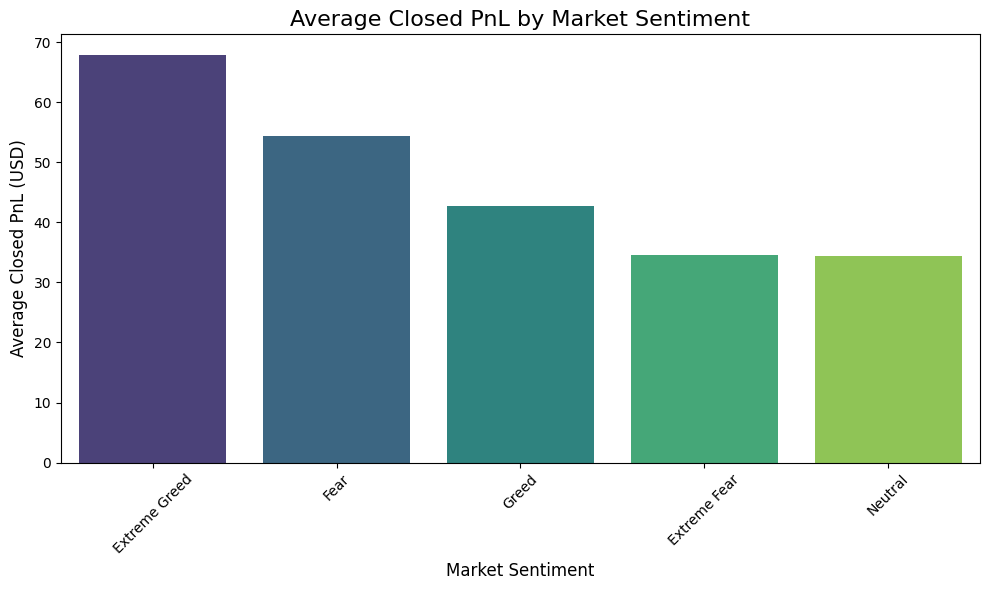


--- Analyzing Total Trading Volume by Market Sentiment ---
classification
Fear             4.833248e+08
Greed            2.885825e+08
Neutral          1.802421e+08
Extreme Greed    1.244652e+08
Extreme Fear     1.144843e+08
Name: Size USD, dtype: float64


/tmp/ipython-input-2965839607.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volume_by_sentiment.index, y=volume_by_sentiment.values, palette='plasma', order=volume_by_sentiment.index)


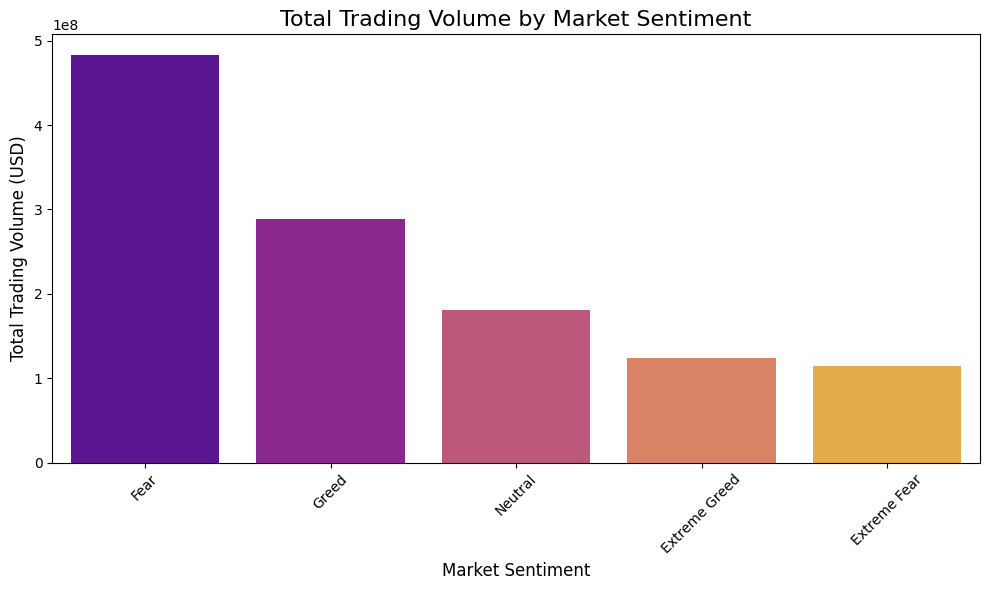


--- Analyzing Trade Side Count by Market Sentiment ---
Side              BUY   SELL
classification              
Extreme Fear    10935  10465
Extreme Greed   17940  22052
Fear            30270  31567
Greed           24576  25727
Neutral         18969  18717


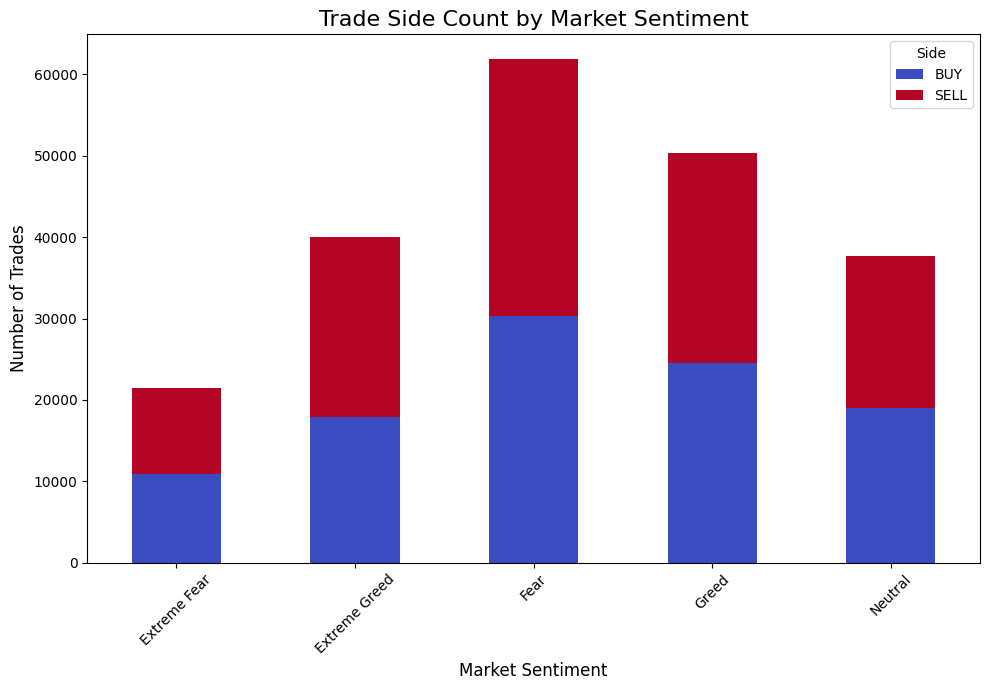


--- Analyzing Average PnL by Trade Side and Sentiment ---
Side                  BUY        SELL
classification                       
Extreme Fear    34.114627   34.980106
Extreme Greed   10.498927  114.584643
Fear            63.927104   45.049641
Greed           25.002302   59.691091
Neutral         29.227429   39.456408


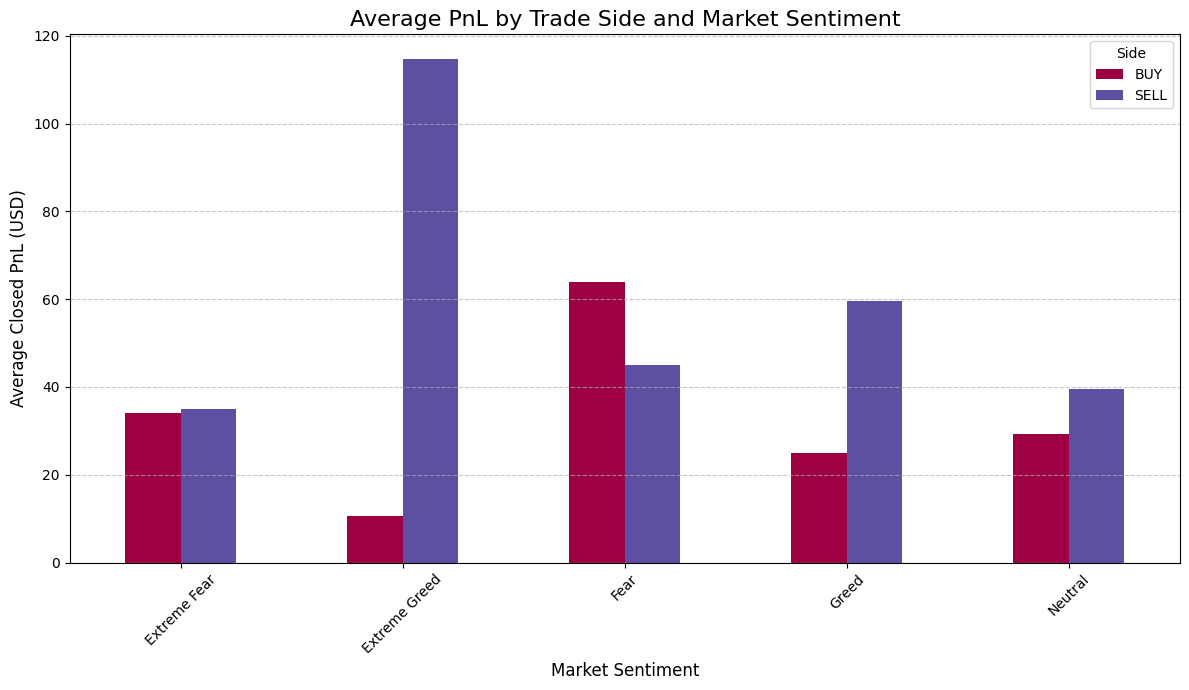


Analysis complete. All plots and the merged data file have been saved.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_trader_sentiment():
    """
    Analyzes trader performance in relation to market sentiment using historical
    trade data and the Fear & Greed Index.
    """
    # --- 1. Load Data ---
    try:
        # Load the historical trader data from Hyperliquid
        historical_data = pd.read_csv('/historical_data.csv')
        # Load the Bitcoin Market Sentiment (Fear & Greed Index)
        fear_greed_index = pd.read_csv('/fear_greed_index.csv')
    except FileNotFoundError as e:
        print(f"Error loading data file: {e}. Please ensure the CSV files are in the correct directory.")
        return

    # --- 2. Data Preprocessing ---
    # Convert timestamp columns to a consistent date format for merging.
    # For historical_data, extract the date from 'Timestamp IST'.
    historical_data['date'] = pd.to_datetime(historical_data['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date

    # For fear_greed_index, convert the 'date' column to datetime objects.
    fear_greed_index['date'] = pd.to_datetime(fear_greed_index['date']).dt.date

    # --- 3. Merge Datasets ---
    # Perform an inner merge on the 'date' column to combine the two datasets.
    # This aligns each trade with the market sentiment on that specific day.
    merged_data = pd.merge(historical_data, fear_greed_index, on='date', how='inner')

    # --- 4. Analysis & Visualization ---

    # a) Analyze the relationship between Closed PnL and market sentiment
    print("--- Analyzing Average PnL by Market Sentiment ---")
    pnl_by_sentiment = merged_data.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)
    print(pnl_by_sentiment)

    # Visualize PnL by sentiment
    plt.figure(figsize=(10, 6))
    sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values, palette='viridis', order=pnl_by_sentiment.index)
    plt.title('Average Closed PnL by Market Sentiment', fontsize=16)
    plt.xlabel('Market Sentiment', fontsize=12)
    plt.ylabel('Average Closed PnL (USD)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('pnl_by_sentiment.png')
    plt.show() # Display the plot

    # b) Analyze trading volume by sentiment
    print("\n--- Analyzing Total Trading Volume by Market Sentiment ---")
    volume_by_sentiment = merged_data.groupby('classification')['Size USD'].sum().sort_values(ascending=False)
    print(volume_by_sentiment)

    # Visualize trading volume by sentiment
    plt.figure(figsize=(10, 6))
    sns.barplot(x=volume_by_sentiment.index, y=volume_by_sentiment.values, palette='plasma', order=volume_by_sentiment.index)
    plt.title('Total Trading Volume by Market Sentiment', fontsize=16)
    plt.xlabel('Market Sentiment', fontsize=12)
    plt.ylabel('Total Trading Volume (USD)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('volume_by_sentiment.png')
    plt.show() # Display the plot

    # c) Analyze the relationship between trading side (Buy/Sell) and sentiment
    print("\n--- Analyzing Trade Side Count by Market Sentiment ---")
    side_by_sentiment = merged_data.groupby(['classification', 'Side']).size().unstack()
    print(side_by_sentiment)

    # Visualize trade side by sentiment
    side_by_sentiment.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='coolwarm')
    plt.title('Trade Side Count by Market Sentiment', fontsize=16)
    plt.xlabel('Market Sentiment', fontsize=12)
    plt.ylabel('Number of Trades', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Side')
    plt.tight_layout()
    plt.savefig('side_by_sentiment.png')
    plt.show() # Display the plot

    # d) Analyze the profitability of Buy vs Sell trades in different market sentiments
    print("\n--- Analyzing Average PnL by Trade Side and Sentiment ---")
    pnl_by_side_sentiment = merged_data.groupby(['classification', 'Side'])['Closed PnL'].mean().unstack()
    print(pnl_by_side_sentiment)

    # Visualize the profitability of Buy vs Sell trades
    pnl_by_side_sentiment.plot(kind='bar', figsize=(12, 7), colormap='Spectral')
    plt.title('Average PnL by Trade Side and Market Sentiment', fontsize=16)
    plt.xlabel('Market Sentiment', fontsize=12)
    plt.ylabel('Average Closed PnL (USD)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Side')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('pnl_by_side_sentiment.png')
    plt.show() # Display the plot

    # --- 5. Save Merged Data ---
    # Save the combined data to a new CSV file for further inspection or use.
    merged_data.to_csv('merged_trader_sentiment_data.csv', index=False)
    print("\nAnalysis complete. All plots and the merged data file have been saved.")

if __name__ == '__main__':
    analyze_trader_sentiment()

